### **A Ch Rohit**
### **E0320022**
### **CSE340 Machine Learning CA4**
### **Stroke Prediction**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

## **Loading the dataset**

In [37]:
df = pd.read_csv('stroke.csv')
df=df.iloc[:,1:]

In [38]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## **Exploratory Data Analysis**

In [39]:
df.shape

(5110, 11)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [41]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [42]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [43]:
df = df.fillna(method='ffill')
from sklearn.preprocessing import LabelEncoder
columns=["gender","ever_married","work_type","Residence_type","smoking_status"]
le= LabelEncoder()
for col in df.columns:
    if col in columns:
        df[col]=le.fit_transform(df[col])
x=df.drop('stroke',axis=1)
y=df['stroke']

## **Correlation plot** 

<AxesSubplot:>

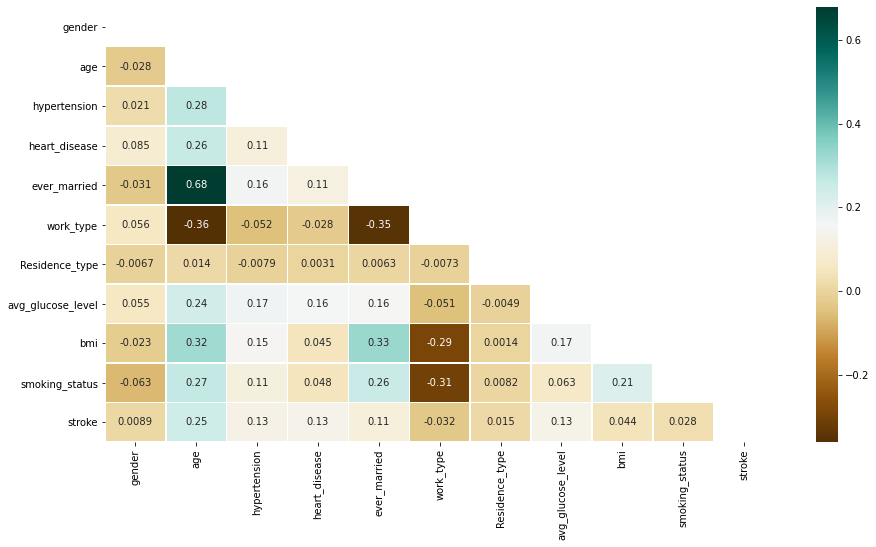

In [44]:
corr = df.corr()
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,cmap='BrBG',annot=True,linewidth=.5,square=False)

## **Correlation of all columns with respect to class**

<AxesSubplot:>

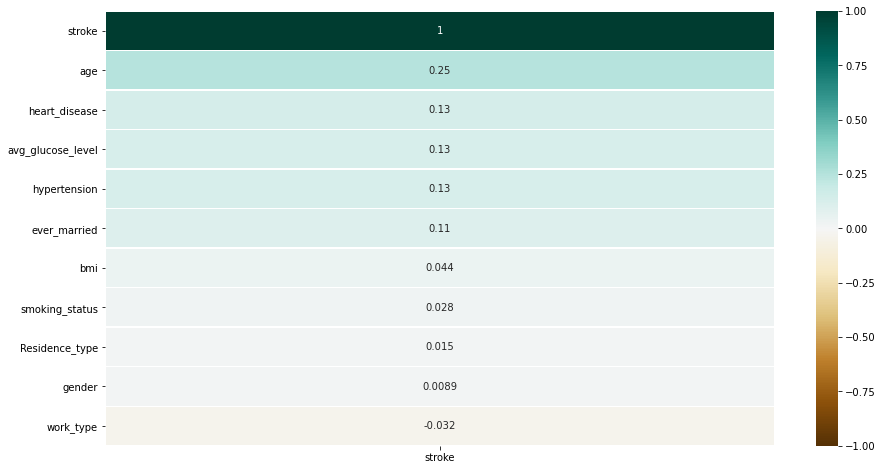

In [45]:
plt.figure(figsize=(15,8))

sns.heatmap(df.corr()[['stroke']].sort_values(by='stroke', ascending=False),cmap='BrBG', vmin=-1, vmax= 1 , center=0, annot=True,linewidth=.5,square=False)

## **Train Test Split**



In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

In [47]:
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(X_train)
x_test = pca.transform(X_test)

In [48]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([7.94969336e-01, 1.83062520e-01, 2.09152286e-02, 4.72189324e-04,
       3.02612027e-04, 9.52872077e-05, 9.17105617e-05, 4.36928891e-05,
       3.00907849e-05, 1.73327338e-05])

## **Decision Tree**

In [49]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42, max_depth=7)
dtc = dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

In [50]:
from sklearn.metrics import *

dtc_acc = accuracy_score(y_test, y_pred_dtc)
dtc_acc

0.9393346379647749

In [51]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.07      0.02      0.03        50

    accuracy                           0.94      1022
   macro avg       0.51      0.50      0.50      1022
weighted avg       0.91      0.94      0.92      1022



In [52]:
print(confusion_matrix(y_test, y_pred_dtc))

[[959  13]
 [ 49   1]]


In [53]:
f1_dtc = f1_score(y_test, y_pred_dtc)
print("F1-Score: ", f1_dtc)

F1-Score:  0.03125


### **Random Forest**

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc = rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
f1_rfc = f1_score(y_test, y_pred_rfc)

In [55]:
print("F1-Score: ", f1_rfc)
print("Accuracy: ", accuracy_score(y_test, y_pred_rfc))

F1-Score:  0.0
Accuracy:  0.9481409001956947


In [23]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



In [24]:
print(confusion_matrix(y_test, y_pred_rfc))

[[971   1]
 [ 50   0]]


## **XGBoost**

In [25]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg = xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)
f1_xg = f1_score(y_test, y_pred_xg)

In [26]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_xg))
print("F1- Score     : ", f1_xg)

Accuracy Score:  0.9481409001956947
F1- Score     :  0.15873015873015872


In [27]:
print(confusion_matrix(y_test, y_pred_xg))

[[964   8]
 [ 45   5]]


In [28]:
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       972
           1       0.38      0.10      0.16        50

    accuracy                           0.95      1022
   macro avg       0.67      0.55      0.57      1022
weighted avg       0.93      0.95      0.93      1022



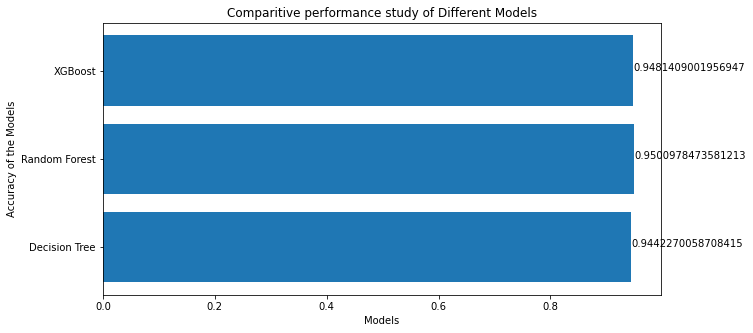

In [29]:
data = {
    'Decision Tree':accuracy_score(y_test, y_pred_dtc),
    'Random Forest':accuracy_score(y_test, y_pred_rfc),
    'XGBoost':accuracy_score(y_test, y_pred_xg),
}
activation = list(data.keys())
accuracy = list(data.values())

fig = plt.figure(figsize=(10,5))
plt.barh(activation, accuracy)
plt.xlabel("Models")
plt.ylabel("Accuracy of the Models")
plt.title("Comparitive performance study of Different Models")
for i, v in enumerate(accuracy):
  plt.text(v,i, str(v))
plt.show()

## **ROC Curve**

In [30]:
y_score1 = dtc.predict_proba(X_test)[:,1]
y_score2 = rfc.predict_proba(X_test)[:,1]
y_score3 = xg.predict_proba(X_test)[:,1]

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)

In [32]:
print('roc_auc_score for DecisionTree : ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for XGBoost      : ', roc_auc_score(y_test, y_score3))

roc_auc_score for DecisionTree :  0.7932921810699588
roc_auc_score for Random Forest:  0.7861008230452674
roc_auc_score for XGBoost      :  0.8058230452674897


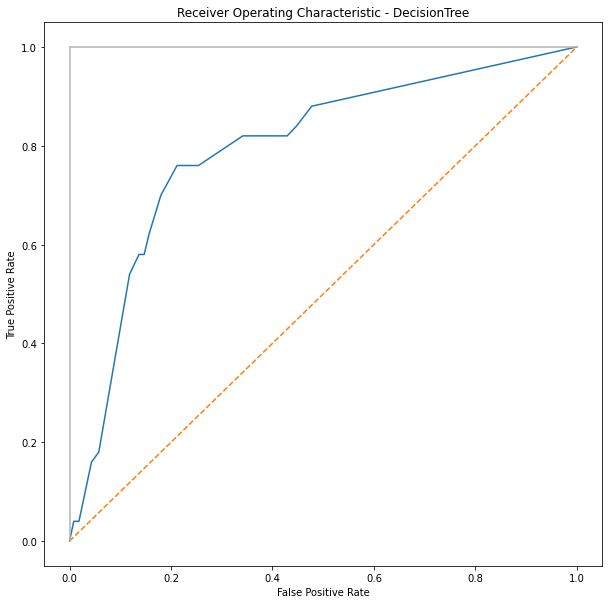

In [33]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



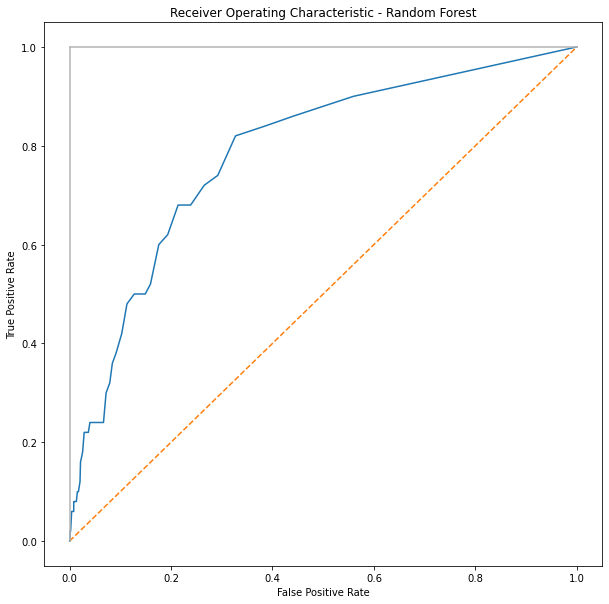

In [34]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


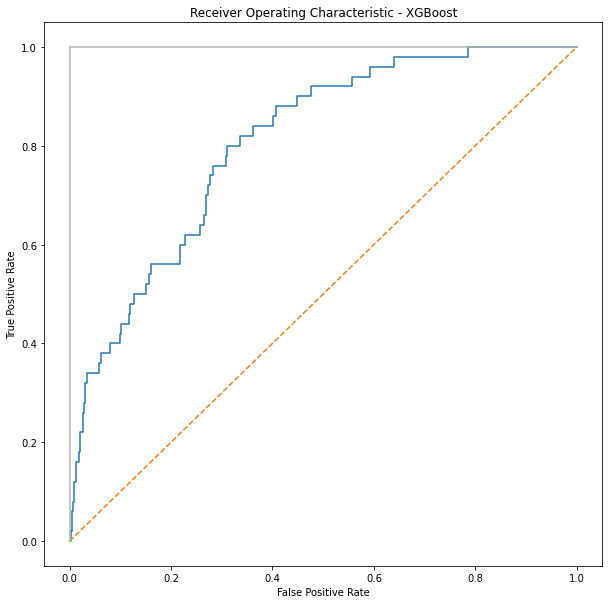

In [35]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - XGBoost')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **SGD Optimizer**

### **ANN-ReLu**

In [36]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [57]:
model = Sequential()
model.add(Dense(units=256, input_shape=(x.shape[1], ), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)               

In [61]:
model.compile(optimizer="adam",loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
hist = model.fit(X_train, y_train, epochs=30, verbose=1, batch_size=32, validation_split=0.2, callbacks=[early_stop])

Epoch 1/30
103/103 [==============================] - 2s 7ms/step - loss: 0.3824 - accuracy: 0.9294 - val_loss: 0.2578 - val_accuracy: 0.9425
Epoch 2/30
103/103 [==============================] - 0s 4ms/step - loss: 0.2327 - accuracy: 0.9526 - val_loss: 0.2235 - val_accuracy: 0.9425
Epoch 3/30
103/103 [==============================] - 0s 5ms/step - loss: 0.2217 - accuracy: 0.9532 - val_loss: 0.2024 - val_accuracy: 0.9425
Epoch 4/30
103/103 [==============================] - 1s 5ms/step - loss: 0.2029 - accuracy: 0.9532 - val_loss: 0.1975 - val_accuracy: 0.9425
Epoch 5/30
103/103 [==============================] - 1s 5ms/step - loss: 0.1958 - accuracy: 0.9535 - val_loss: 0.2219 - val_accuracy: 0.9425
Epoch 6/30
103/103 [==============================] - 1s 5ms/step - loss: 0.1936 - accuracy: 0.9532 - val_loss: 0.1966 - val_accuracy: 0.9425
Epoch 7/30
103/103 [==============================] - 0s 5ms/step - loss: 0.1880 - accuracy: 0.9535 - val_loss: 0.1975 - val_accuracy: 0.9425
Epoch 

In [63]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy is: ', accuracy)
print("Test loss is    : ", loss)

32/32 [==============================] - 0s 2ms/step - loss: 0.1764 - accuracy: 0.9511
Test accuracy is:  0.951076328754425
Test loss is    :  0.1763533502817154


In [64]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
pred = model.predict(X_test)
pred = pred.argmax(axis=1)
cm = confusion_matrix(y_test, pred)
print(cm)

32/32 [==============================] - 0s 2ms/step
[[972   0]
 [ 50   0]]


In [65]:
from sklearn.metrics import accuracy_score
accuracy_relu = accuracy_score(y_test, pred)
print("F1 Score      : ", f1_score(y_test, pred, average='macro'))
print('Accuracy Score: ', accuracy_relu)

F1 Score      :  0.48746238716148443
Accuracy Score:  0.9510763209393346


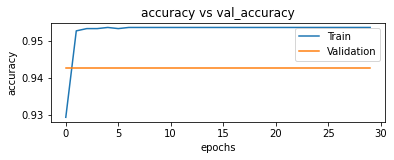

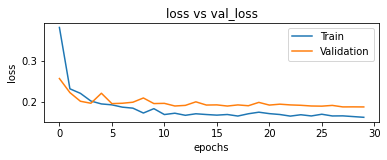

In [66]:
plt.subplot(211)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('accuracy vs val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.subplot(212)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss vs val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.show()